In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

* <font color="yellow">Encodage</font>
    * `LabelBinarizer`
    * `LabelEncoder`
    * `MultiLabelBinarizer`
    * `OneHotEncoder`
    * `OrdinalEncoder`
* <font color="green">Normalisation</font>
    * `KernelCenterer`
    * `MaxAbsScaler`
    * `MinMaxScaler`
    * `Normalizer`
    * `RobustScaler`
    * `StandardScaler`
* <font color="blue">combinaison de features</font>
    * `PolynomialFeatures`
* <font color="purple">Transformation non linéaire</font>
    * `PowerTransformer`
    * `QuantileTransformer`
* <font color="gray">Discrétisation</font>
    * `Binarizer`
    * `KNinsDiscretizer`
* <font color="red">Personnalisation</font>
    * `FunctionTransformer`

Plus d'info ici: [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

## L'encodage

In [2]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

Or nous avons besoin de données **numériques**

In [7]:
encoder = LabelEncoder()
encoder.fit_transform(y) # equivalent de fit puis transform

array([0, 1, 0, 2])

In [4]:
encoder.inverse_transform(np.array([0, 0, 2]))

array(['chat', 'chat', 'oiseau'], dtype='<U6')

L'avantage est donc que le traitement est réversible

In [5]:
encoder.inverse_transform(np.array([0, 0, 2]))

array(['chat', 'chat', 'oiseau'], dtype='<U6')

Mais pour des tableaux à plusieurs colonnes, `LabelEncoder` n'est pas fonctionnel et il faut utiliser `OrdinalEncoder` (et vice-versa; c'est sûrement pour éviter des gaffes de manip')

Néanmoins suivant les cas, l'ordre numérique obtenu peut n'avoir aucun sens

`chat < chien` ??

Pour éviter cela, on peut utiliser un encodage `OneHot` qui crée autant de colonnes que de catégories

In [10]:
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

Même s'il y a un grand nombre de lignes, c'est un stockage optimisé en mémoire (avec beaucoup de 0, codé sous forme CSR)


|     | Encodage Ordinal | Encodage One-Hot |
|:----|:-----------------|:-----------------|
| y | `LabelEncoder`   | `LabelBinarizer` |
| X | `OrdinalEncoder` | `OneHotEncoder`  |

## La normalisation

La normalisation va permettre à ce qu'une variable ne prenne pas le dessus sur les autres dans certains algos (par exemple basé sur une descente de gradient ou un calcul de variance)


|                  | Transformation                                    | Commentaire                                                                |
|:-----------------|:--------------------------------------------------|:---------------------------------------------------------------------------|
| `MinMaxScaler`   | $X \rightarrow \frac{X-X_{min}}{X_{max}-X_{min}}$ | Sensible aux valeurs aberrantes (*outliers*)                               |
| `StandardScalar` | $X \rightarrow \frac{X-\mu_X}{\sigma_X}$          | Moyenne nulle, écart type de 1<br>(aussi sensibles aux valeurs aberrantes) |
| `RobustScaler`   | $X \rightarrow \frac{X-median_X}{IQR_X}$          | IQR = Interquartiles; robuste aux *outliers*                               |

## Les autres


|                       | Commentaire                                                                              |
|:----------------------|:-----------------------------------------------------------------------------------------|
| `PolynomialFeatures`  | A partir d une variable, injecte une base polynomial : $1, X, X^2, \ldots$               |
| `Binarizer`           | Permet de décomposer un ensemble de valeurs en 0-1 via un seuil (2 catégories)           |
| `KNinsDiscretizer`    | Permet de décomposer un ensemble de valeurs en N catégories                              |
| `FunctionTransformer` | Faites vous plaisir, il prend n'importe quelle fonction et la convertit en *Transformer* |

In [27]:
np.random.seed(0)
X = np.linspace(-3,3, 50).reshape((-1,1))
y = X**2 + np.random.randn(len(X), 1)

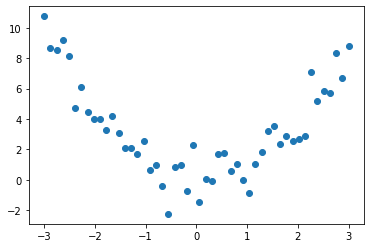

In [29]:
plt.scatter(X, y)

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
y_pred1 = model.predict(X)

In [50]:
from sklearn.preprocessing import PolynomialFeatures
X_poly2 = PolynomialFeatures(3).fit_transform(X) # poly ordre 2 => 3 dimensions
model = LinearRegression().fit(X_poly2, y)
y_pred2 = model.predict(X_poly2)

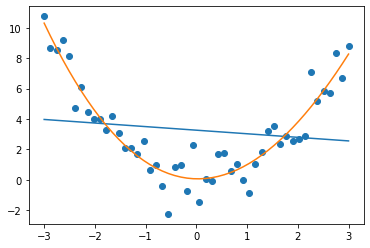

In [51]:
plt.scatter(X, y)
plt.plot(X, y_pred1)
plt.plot(X, y_pred2)

## Passons-le à la chaine de traitement

Le bon moyen d'alléger un traitement une fois que l'on définit des transformations à appliquer systématiquement

In [53]:
from sklearn.pipeline import make_pipeline

In [61]:
model = make_pipeline(PolynomialFeatures(3), LinearRegression()) # autant que vous voulez !
model.fit(X, y)
y_pred = model.predict(X)

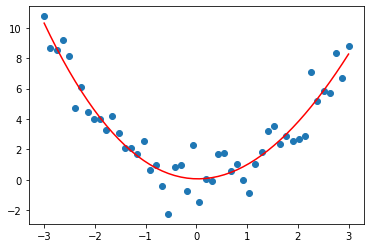

In [62]:
plt.scatter(X, y)
plt.plot(X, y_pred2, c='r')

### Combo avec `GridSearchCV`

In [63]:
from sklearn.model_selection import GridSearchCV

In [72]:
model = make_pipeline(PolynomialFeatures(), LinearRegression())
params = {
    'polynomialfeatures__degree' : [1,2,3,4,5] # le <adapter/model>__<paremeter_name>
}
gridcv = GridSearchCV(model, param_grid=params, cv=5)
gridcv.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5]})

In [73]:
gridcv.best_params_

{'polynomialfeatures__degree': 3}

In [74]:
gridcv.score(X, y)

0.8867279312169927

Bonus pour les tableaux avec des colonnes catégorielles => [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) ou bien
 [`make_column_selector`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html) ou encore [`make_union`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_union.html?highlight=make_union#sklearn.pipeline.make_union) pour des traitements en combinés sur les mêmes colonnes.

et pour le nettoyage voir

| Traitement                                                                                                                                                  | Contexte                                                                    |
|:------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------|
| [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer) | Permet de remplacer sélectivement des valeurs par une nouvelle valeur       |
| [`KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html?highlight=knnimputer#sklearn.impute.KNNImputer)             | Permet de remplacer les valeurs manquantes par les valeurs les plus proches |
